# __Etivity 3__
***
<center>

<div>
<img src="https://miro.medium.com/max/1400/1*cG6U1qstYDijh9bPL42e-Q.jpeg" width="350"/>
</div>

</center>

## Introduction

In this project we have considered two data sets: one synthetic and one real world data set (California Housing). The synthetic data set has $1,000$ samples and five features which will all be graphed using a scatter plot. We will then add outliers to our data set, scale all of the features as instructed and plot the features again. Next we will move on to dealing with the outliers. We will use four methods to do this: z-score, interquartile range based filtering, percentiles and winsorization. Once the outliers have been dealt with, the data set will be split into train and test for the four different methods. The data set as it was before the outlier methods were employed will also be split into train and test at this point for comparison. Next we will used four differed regression techniques: linear regression, logistic regression, xgboost regressor and k neighbours (classifier and regressor). 

<br>

### **Outlier**
---
Before data modeling, it is essential to clean the data we’re dealing with so it best represents the problem. Sometimes, there may be extreme values in a dataset that are outside the expected range. These values are called outliers and need to be detected & removed before the dataset is dealt with. 

<br>

### **Outlier techniques**
---
**Z-score based technique**

A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution.
- Z-tests test the mean of a distribution.
- For each significance level in the confidence interval.
- Z-test has a single critical value.
- For example, 1.96 for 5% two-tailed.

Z-Score is also known as the standard score. It tells which side of the mean a data point is located, how far it is from the mean. In particular, the Z-score tells how many standard deviations away from the mean a data point is. (W. 2021)

<br>

**IQR based filtering & Percentiles**

Not all data is normally distributed. To deal with such non-gaussian data, the Interquartile Range method is a good statistic. In descriptive statistics, the IQR is also called the midspread, middle 50%, or H spread. It is a measure of statistical dispersion. It is equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile. These quartiles can be seen on a box plot on the data. It is a trimmed estimator, defined as the 25% trimmed range, and is a commonly used robust measure of scale. Percentiles help identify outliers better than averages since outliers and typical experience are evident when looking at different percentile calculations. (Kidder 2017)

<br>

**Winsorization**

 “To winsorize data means to set extreme outliers equal to a specified percentile of the data” (Zach, 2021). For instance, if you were to take a 90% winsorization it would change all values that are not in the middle 90% of the data. That is to say that any values above the 95th percentile would be set equal to the of the value 95th percentile and all values below the 5th percentile would be set equal to the value of the 5th percentile. This means the top and bottom 5% of data would have less extreme values. Where trimming data removes outliers, this method replaces them so you are not totally discounting the information that might be obtained from the outliers.

<br>

 **Regression**

- Regression consists of mathematical methods that allow data scientists to predict a continuous outcome (y) based on the value of one or more predictor variables (x). Linear regression is probably the most popular form of regression analysis because of its ease-of-use in predicting and forecasting.
- Regression is classified as linear, multiple and multivariate depending on the number of input features and output labels.
- A trained regression model is evaluated on the basis of three main metrics: variance, bias and error. If the variance is high, it leads to overfitting and if the bias is high, it leads to underfitting.
- The ultimate aim of the regression algorithm is to plot a best-fit curve between the data.

<br>

### **Methods**
---

**Linear Regression**

The main goal of Linear regression is to use route of “least squares” to fit a line (y axis intercept and a slope (x)) to model a given data set. The “best fit” line is motivated by the principle of least squares, which can be traced back to the German mathematician Gauss (1777–1855). The idea behind linear regression is that you can establish whether there is a relationship (correlation) between a dependent variable (Y) and an independent variable (X) using a best fit straight line (Constable, 2021). Linear regression quantifies not only the relationship (if any) in the data, referred to as R $^2$ – but also secondly determines how reliable that relationship is using a p-value.

In drawing any line through the dataset we can measure “squares” by calculating the distance from the drawn line to every single datapoint within the set. Squaring each distance will deal with any negative values contained in the dataset which may impact our calculation – the distance from a line to a data point is referred to as a “residual” hence the squared value = R $^2$. In a logistic regression model, we rotate the line incrementally in small steps calculating residual after residual until we encounter the sum of “least squares” by comparing the sum of each residual.

R $^2$ = Var(mean) – Var(fit)

<br>

**Var(mean)**

Variance is an important term when we speak about Linear Regression – referring to the difference in “fits” between the testing and training datasets. We will want to achieve a low bias and low variance to best please both – avoiding at all costs in both cases a “lowest” bias or “lowest” variance which would ultimately result in a poor machine learning model. For example, a “lowest” variance would give us an exact and perfect relationship between the dependant and independent variables in every case, which is implausible in reality.

<br>

**K-Neighbours**

‘K-Neighbors’ is based on k-nearest neighbours that can be used for regression or classification. “The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points” (Singh, 2018). “The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.” (scikit-learn, 2019). The first step is to calculate the distance between the new point and each training point. There are two frequently used methods Euclidian and Manhattan distance for continuous data and Hamming distance for categorical. Once these distances have been calculated the next step is to select the nearest points. The number of points chosen at this stage is determined by the value of k. The new point is then assigned the class that is most common among its neighbours.

## Set-Up

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm # For colors in scatterplots
import seaborn as sns # For plotting
import warnings # Ignore Warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_regression # To create synthetic dataset 
from sklearn.datasets import fetch_california_housing # To import california_housing dataset
from xgboost import XGBClassifier # XG Boost Model
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.model_selection import train_test_split # Split into train and test
from sklearn.neighbors import KNeighborsRegressor # For K Neighbors
from sklearn.neighbors import KNeighborsClassifier # For K Neighbors
from sklearn.metrics import r2_score # R^2
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn import preprocessing # Label encoder
from sklearn.preprocessing import OneHotEncoder # One Hot Encoder

# Set scale of the scatter plots
SPLOTSCALE = .8

# Set scale of outlier plots
PLOTSCALE = .4

# Sets the random state (seed) so results can be replicated
RANDOM_STATE=7

# K Neighbours - # of neighbors
KREG = 3
KCLASS = 2

# Names of each Model
NAMES = ['Linear Regression',
         'Logistic Regression',
         'XGBoost Regressor',
         'K Neighbor Regressor',
         'K Neighbor Classifier']

# Code for each Model
MODELS = [LinearRegression(),
          LogisticRegression(solver='liblinear'),
          XGBClassifier(eval_metric='mlogloss'),
          KNeighborsRegressor(n_neighbors=KREG),
          KNeighborsClassifier(n_neighbors=KCLASS)]

### Scatterplot Function

In [2]:
XList = {}
for i in range(6):
    XList[i-1] = 'Feature %s' % i

def scatterPlot(title="Title",plotType=""):
    # Synthetic Plot Features
    if plotType == 's':
        colors = iter(cm.rainbow(np.linspace(0, 1, len(XList)))) # For the color of the each Feature in scatterplot
        f, ax = plt.subplots(3, 2, figsize=(12*SPLOTSCALE, 15*SPLOTSCALE))
        f.suptitle(title, fontsize=16), f.delaxes(ax[2,1]) # Removing index in pos 2,1
        
        a=[0,0,1,1,2] # For the 'y' positions
        b=[0,1,0,1,0] # For the 'x' positions
        n = 5
        labels = XList
    
    # Housing Plot Features
    else:
        colors = iter(cm.rainbow(np.linspace(0, 1, len(housing.feature_names)))) # For the color of the each Feature in scatterplot
        f, ax = plt.subplots(4, 2, figsize=(12*SPLOTSCALE, 15*SPLOTSCALE))
        f.suptitle(title, fontsize=16)

        a=[0,0,1,1,2,2,3,3] # For the 'y' positions
        b=[0,1,0,1,0,1,0,1] # For the 'x' positions
        n = 8
        labels = housing.feature_names

    # Code to plot
    for i in range(0,n):
        plt.sca(ax[a[i], b[i]])
        plt.scatter(X[:,i], y, color=next(colors), marker='.', label=labels[i]) # 'next()' gets the next iteration
        plt.xlabel(labels[i])
        if b[i] == 0:
            plt.ylabel('y axis')
        plt.legend(loc='upper right')

### Outliers Function

In [3]:
def comparePlot(df,dfnew,feature,title,type1='capping'):
    # compare the distribution after capping/trimming
    print(title + ': Comparing the distribution of',feature, 'after', type1)
    plt.figure(figsize=(12*PLOTSCALE,6*PLOTSCALE))
    plt.subplot(2,2,1)
    sns.distplot(df[feature])
    plt.subplot(2,2,2)
    sns.boxplot(df[feature])
    plt.subplot(2,2,3)
    sns.distplot(dfnew[feature])
    plt.subplot(2,2,4)
    sns.boxplot(dfnew[feature])
    plt.show()


def outliers(feature,df,df_z,df_iqr,df_per,df_win):
    # Z-score

    # finding the boundary values
    threshold = 10 # Was 3
    HA = df_z['y'].mean() + threshold*df_z['y'].std()
    LA = df_z['y'].mean() - threshold*df_z['y'].std()

    # trimming of Outliers
    df_z = df_z[(df_z['y'] < HA) & (df_z['y'] > LA)]
    df_z.head()

    # capping on Outliers
    UL = df_z['y'].mean() + threshold*df_z['y'].std()
    LL = df_z['y'].mean() - threshold*df_z['y'].std()

    # apply the capping
    df_z['y'] = np.where(
        df_z['y']>UL, UL,
        np.where(
            df_z['y']<LL, LL,
            df_z['y']
        )
    )

    #-------------------------------------------------------------------------
    # IQR based filtering
    
    # finding the IQR
    Q1 = df_iqr[feature].quantile(0.25)
    Q3 = df_iqr[feature].quantile(0.75)
    IQR = Q3 - Q1

    # finding upper and lower limit
    # 1.5 is the general consensis
    UL2 = Q3 + 1.5 * IQR
    LL2 = Q1 - 1.5 * IQR

    # finding Outliers
    df_iqr[df_iqr[feature] > UL2]
    df_iqr[df_iqr[feature] < LL2]

    # trimming
    new_df_iqr = df_iqr[df_iqr[feature] < UL2]
    new_df_iqr.shape

    # capping
    new_df_cap = df_iqr.copy()
    new_df_cap[feature] = np.where(
        new_df_cap[feature] > UL2, UL2,
        np.where(
            new_df_cap[feature] < LL2, LL2,
            new_df_cap[feature]
        )
    )
    df_iqr = new_df_iqr
    
    #-------------------------------------------------------------------------
    # Percentile

    # upper and lower limit
    # can play with the parameters
    UL3 = df_per[feature].quantile(0.90)
    LL3 = df_per[feature].quantile(0.10)

    # apply trimming
    new_df_per = df_per[(df_per[feature] <= UL3) & (df[feature] >= LL3)]
    df_per = new_df_per

    #-------------------------------------------------------------------------
    # Winsorization
    # apply capping (Winsorization)
    df_win[feature] = np.where(df_win[feature] >= UL3, UL3,
            np.where(df_win[feature] <= LL3, LL3,
            df_win[feature]))

    return df_z, df_iqr, df_per, df_win

### Function to print model results

In [4]:
def print_results(input_model, model_name, XTrain, yTrain, XTest, yTest,
                                           XTrainZ, yTrainZ, XTestZ, yTestZ,
                                           XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
                                           XTrainPER, yTrainPER, XTestPER, yTestPER,
                                           XTrainWIN, yTrainWIN, XTestWIN, yTestWIN):
    # Creating the model
    model = z_model = iqr_model = per_model = win_model = input_model

    # Fitting the model to the data
    model.fit(XTrain, yTrain)
    z_model.fit(XTrainZ, yTrainZ)
    iqr_model.fit(XTrainIQR, yTrainIQR)
    per_model.fit(XTrainPER, yTrainPER)
    win_model.fit(XTrainWIN, yTrainWIN)

    # Make predictions (assign class labels)
    y_pred = model.predict(XTest)
    y_predZ = z_model.predict(XTestZ)
    y_predIQR = iqr_model.predict(XTestIQR)
    y_predPER = per_model.predict(XTestPER)
    y_predWIN = win_model.predict(XTestWIN)
    
    # Dataframe for Scores
    if model_name != 'Linear Regression' and model_name != 'K Neighbor Regressor':
      df_scores = pd.DataFrame({'Score': ['Training Accuracy',
                                          'Test Accuracy',
                                          'R\u00b2',
                                          'Accuracy',
                                          'Weighted F1',
                                          'Weighted Precision',
                                          'Weighted Recall'],
                                
                                'Train/Test': [model.score(XTrain, yTrain),
                                               model.score(XTest, yTest),
                                               r2_score(yTest, y_pred),
                                               accuracy_score(yTest, y_pred),
                                               f1_score(yTest, y_pred, average='weighted'),
                                               precision_score(yTest, y_pred, average='weighted'),
                                               recall_score(yTest, y_pred, average='weighted')],
                                
                                'Z-Score': [z_model.score(XTrainZ, yTrainZ),
                                            z_model.score(XTestZ, yTestZ),
                                            r2_score(yTestZ, y_predZ),
                                            accuracy_score(yTestZ, y_predZ),
                                            f1_score(yTestZ, y_predZ, average='weighted'),
                                            precision_score(yTestZ, y_predZ, average='weighted'),
                                            recall_score(yTestZ, y_predZ, average='weighted')],
                                
                                'IQR': [iqr_model.score(XTrainIQR, yTrainIQR),
                                        iqr_model.score(XTestIQR, yTestIQR),
                                        r2_score(yTestIQR, y_predIQR),
                                        accuracy_score(yTestIQR, y_predIQR),
                                        f1_score(yTestIQR, y_predIQR, average='weighted'),
                                        precision_score(yTestIQR, y_predIQR, average='weighted'),
                                        recall_score(yTestIQR, y_predIQR, average='weighted')],
                                
                                'Percentile': [per_model.score(XTrainPER, yTrainPER),
                                               per_model.score(XTestPER, yTestPER),
                                               r2_score(yTestPER, y_predPER),
                                               accuracy_score(yTestPER, y_predPER),
                                               f1_score(yTestPER, y_predPER, average='weighted'),
                                               precision_score(yTestPER, y_predPER, average='weighted'),
                                               recall_score(yTestPER, y_predPER, average='weighted')],
                                
                                'Winsorization': [win_model.score(XTrainWIN, yTrainWIN),
                                                  win_model.score(XTestWIN, yTestWIN),
                                                  r2_score(yTestWIN, y_predWIN),
                                                  accuracy_score(yTestWIN, y_predWIN),
                                                  f1_score(yTestWIN, y_predWIN, average='weighted'),
                                                  precision_score(yTestWIN, y_predWIN, average='weighted'),
                                                  recall_score(yTestWIN, y_predWIN, average='weighted')]}).round(2) # Rounds values to 2 decimal places
    else:
      df_scores = pd.DataFrame({'Score': ['Training Accuracy',
                                          'Test Accuracy',
                                          'R\u00b2'],
                                
                                'Train/Test': [model.score(XTrain, yTrain),
                                               model.score(XTest, yTest),
                                               r2_score(yTest, y_pred)],
                                
                                'Z-Score': [z_model.score(XTrainZ, yTrainZ),
                                            z_model.score(XTestZ, yTestZ),
                                            r2_score(yTestZ, y_predZ)],
                                
                                'IQR': [iqr_model.score(XTrainIQR, yTrainIQR),
                                        iqr_model.score(XTestIQR, yTestIQR),
                                        r2_score(yTestIQR, y_predIQR)],
                                
                                'Percentile': [per_model.score(XTrainPER, yTrainPER),
                                               per_model.score(XTestPER, yTestPER),
                                               r2_score(yTestPER, y_predPER)],
                                
                                'Winsorization': [win_model.score(XTrainWIN, yTrainWIN),
                                                  win_model.score(XTestWIN, yTestWIN),
                                                  r2_score(yTestWIN, y_predWIN)]}).round(2) # Rounds values to 2 decimal places
                          
    return df_scores

### K Classifier Plot

In [5]:
def kClassPlot(XTrain, yTrain, XTest, yTest,
               XTrainZ, yTrainZ, XTestZ, yTestZ,
               XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
               XTrainPER, yTrainPER, XTestPER, yTestPER,
               XTrainWIN, yTrainWIN, XTestWIN, yTestWIN):

    techniqueName = ['Train/Test','Z-Score','IQR','Percentile','Winsorization']
    techniqueName = [i + " # of neighbors" for i in techniqueName]

    XTrainArray = [XTrain,XTrainZ,XTrainIQR,XTrainPER,XTrainWIN]
    XTestArray = [XTest,XTestZ,XTestIQR,XTestPER,XTestWIN]
    yTrainArray = [yTrain,yTrainZ,yTrainIQR,yTrainPER,yTrainWIN]
    yTestArray = [yTest,yTestZ,yTestIQR,yTestPER,yTestWIN]

    colors = iter(cm.rainbow(np.linspace(0, 1, 10))) # For the color of the each Feature in scatterplot
    f, ax = plt.subplots(3, 2, figsize=(12*SPLOTSCALE, 15*SPLOTSCALE))
    f.suptitle('K Classification Plots', fontsize=16), f.delaxes(ax[2,1]) # Removing index in pos 2,1
    
    a=[0,0,1,1,2,2] # For the 'y' positions
    b=[0,1,0,1,0,1] # For the 'x' positions

    for i in range(5):
        plt.sca(ax[a[i], b[i]])
        training_accuracy = []
        test_accuracy = []
        # try n_neighbors from 1 to 10
        neighbors_settings = range(1, 11)

        for n_neighbors in neighbors_settings:
            # build the model
            knn = KNeighborsClassifier(n_neighbors=n_neighbors)
            knn.fit(XTrainArray[i], yTrainArray[i])
            # record training set accuracy
            training_accuracy.append(knn.score(XTrainArray[i], yTrainArray[i]))
            # record test set accuracy
            test_accuracy.append(knn.score(XTestArray[i], yTestArray[i]))
        plt.plot(neighbors_settings, training_accuracy, label="Training accuracy", color=next(colors))
        plt.plot(neighbors_settings, test_accuracy, label="Test accuracy", color=next(colors))
        plt.ylabel("Accuracy"), plt.xlabel(techniqueName[i])
        plt.legend()

## Dataset 1: Synthetic

### 1.1 Creating the Dataset & Detecting NANs

Data has NANs: False


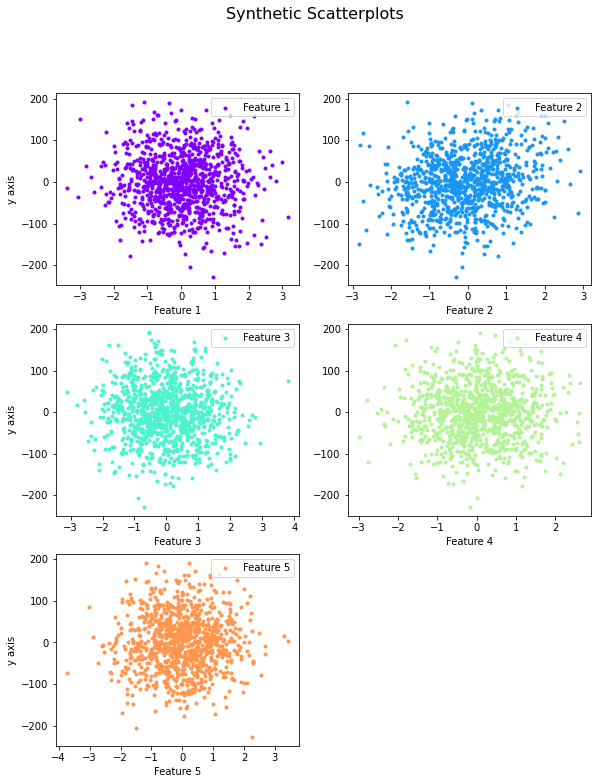

In [6]:
n_samples = 1000
X, y = make_regression(n_samples=n_samples, 
                       n_features=5, 
                       n_informative=1, 
                       noise=65, 
                       random_state=0)

# Checking for NANs
print('Data has NANs:', np.isnan(np.sum(X)))

# Plotting
scatterPlot('Synthetic Scatterplots','s')

### 1.2 Adding Outliers

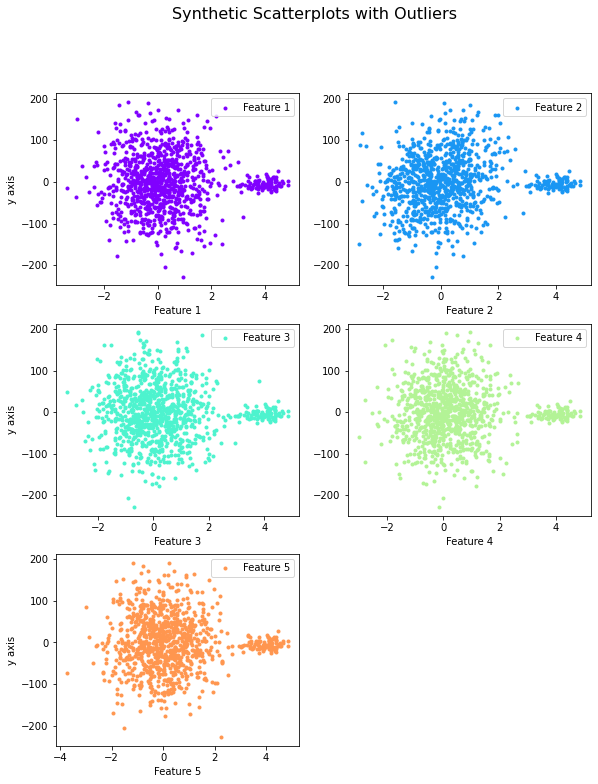

In [7]:
n_outliers = int(np.round(n_samples*0.1))
th = 4
X[:n_outliers] = th + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -th + 10 * np.random.normal(size=n_outliers)


# Plotting
scatterPlot('Synthetic Scatterplots with Outliers','s')

### 1.3 Scaling the Data

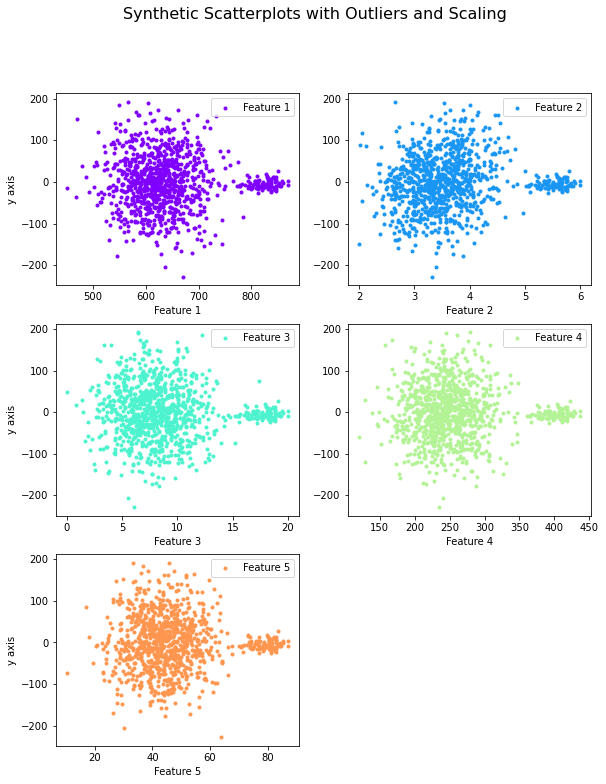

In [8]:
# Scale Feature 1: 450-870 (float)
f1_l, f1_u = float(450), float(870)
X[:,0] = np.interp(X[:,0], (X[:,0].min(), X[:,0].max()), (f1_l, f1_u))

# Scale Feature 2: 2-6 (integer)
f2_l, f2_u = 2, 6
X[:,1] = np.interp(X[:,1], (X[:,1].min(), X[:,1].max()), (f2_l, f2_u))

# Scale Feature 3: 0-20 (integer)
f3_l, f3_u = 0, 20
X[:,2] = np.interp(X[:,2], (X[:,2].min(), X[:,2].max()), (f3_l, f3_u))

# Scale Feature 4: 120.56-436.92 (float)
f4_l, f4_u = float(120.56), float(436.92)
X[:,3] = np.interp(X[:,3], (X[:,3].min(), X[:,3].max()), (f4_l, f4_u))

# Scale Feature 5: 10.22-87.15 (float)
f5_l, f5_u = float(10.22), float(87.15)
X[:,4] = np.interp(X[:,4], (X[:,4].min(), X[:,4].max()), (f5_l, f5_u))

# Scale Output Var: 150000-2000000 (integer)
# Not sure about this??


# Plotting
scatterPlot('Synthetic Scatterplots with Outliers and Scaling','s')

### 1.4 Detect and Remove Outliers

Z-Score: Comparing the distribution of Feature 1 after capping


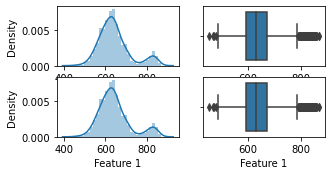

IQR Based Filtering: Comparing the distribution of Feature 1 after capping


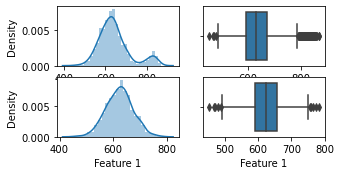

Percentile: Comparing the distribution of Feature 1 after trimming


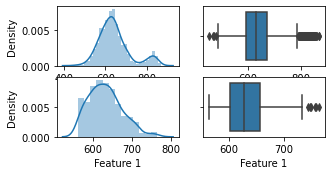

Winsorization: Comparing the distribution of Feature 1 after capping


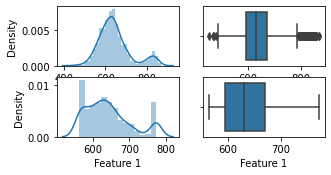

In [9]:
# Converting y to multiclass (5 classes)
c1, c2, c3, c4 = np.percentile(y, [20, 40, 60, 80])
pos = 0
for i in y:
    if i < c1:
        y[pos] = 0
    elif i < c2:
        y[pos] = 1
    elif i < c3:
        y[pos] = 2
    elif i < c4:
        y[pos] = 3
    else:
        y[pos] = 4
    pos+=1

# Convert to DataFrame
df = pd.DataFrame({'Feature 1': X[:,0].flatten(),
                   'Feature 2': X[:,1].flatten(),
                   'Feature 3': X[:,2].flatten(),
                   'Feature 4': X[:,3].flatten(),
                   'Feature 5': X[:,4].flatten(),
                   'y': y})

# Initializing dfs
df_z = df_iqr = df_per = df_win = df.copy()
for i in range(0,5):
    df_z,df_iqr,df_per,df_win = outliers(df.columns[i], df, df_z,df_iqr,df_per,df_win)

# Plotting One Feature
DFLIST = [df_z,df_iqr,df_per,df_win]
DFNAMES = ['Z-Score','IQR Based Filtering','Percentile','Winsorization']
feature = 'Feature 1' 
for i,name in zip(DFLIST, DFNAMES):
    if name == 'Percentile':
        comparePlot(df,i,feature,name,type1='trimming')
    else:
        comparePlot(df,i,feature,name)

# Converting to numpy
df_z = df_z.to_numpy()
df_iqr = df_iqr.to_numpy()
df_per = df_per.to_numpy()
df_win = df_win.to_numpy()

### 1.5 Apply sampling strategies

In [10]:
# Training: 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainZ, XTestZ, yTrainZ,  yTestZ = train_test_split(df_z[:,0:5], df_z[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainIQR, XTestIQR, yTrainIQR, yTestIQR = train_test_split(df_iqr[:,0:5], df_iqr[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainPER, XTestPER, yTrainPER, yTestPER = train_test_split(df_per[:,0:5], df_per[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainWIN, XTestWIN, yTrainWIN, yTestWIN = train_test_split(df_win[:,0:5], df_win[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)

### 1.6 Models

Linear Regression


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.01,0.01,0.02,0.03,0.04
1,Test Accuracy,-0.04,-0.04,0.03,0.01,-0.02
2,R²,-0.04,-0.04,0.03,0.01,-0.02




Logistic Regression


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.32,0.32,0.26,0.24,0.31
1,Test Accuracy,0.28,0.28,0.25,0.29,0.27
2,R²,-1.13,-1.13,-0.99,-0.94,-1.16
3,Accuracy,0.28,0.28,0.25,0.29,0.27
4,Weighted F1,0.26,0.26,0.24,0.28,0.26
5,Weighted Precision,0.27,0.27,0.26,0.31,0.26
6,Weighted Recall,0.28,0.28,0.25,0.29,0.27




XGBoost Regressor


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.97,0.97,0.77,0.73,0.97
1,Test Accuracy,0.24,0.24,0.72,0.78,0.24
2,R²,-0.91,-0.91,0.27,0.40,-0.91
3,Accuracy,0.24,0.24,0.72,0.78,0.24
4,Weighted F1,0.24,0.24,0.72,0.78,0.24
5,Weighted Precision,0.24,0.24,0.73,0.78,0.24
6,Weighted Recall,0.24,0.24,0.72,0.78,0.24




K Neighbor Regressor


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.27,0.27,0.09,0.09,0.31
1,Test Accuracy,-0.38,-0.38,0.03,0.35,-0.37
2,R²,-0.38,-0.38,0.03,0.35,-0.37




K Neighbor Classifier


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.60,0.60,0.48,0.45,0.62
1,Test Accuracy,0.26,0.26,0.46,0.53,0.25
2,R²,-1.06,-1.06,-0.46,-0.18,-1.05
3,Accuracy,0.26,0.26,0.46,0.53,0.25
4,Weighted F1,0.24,0.24,0.43,0.50,0.23
5,Weighted Precision,0.25,0.25,0.50,0.64,0.24
6,Weighted Recall,0.26,0.26,0.46,0.53,0.25


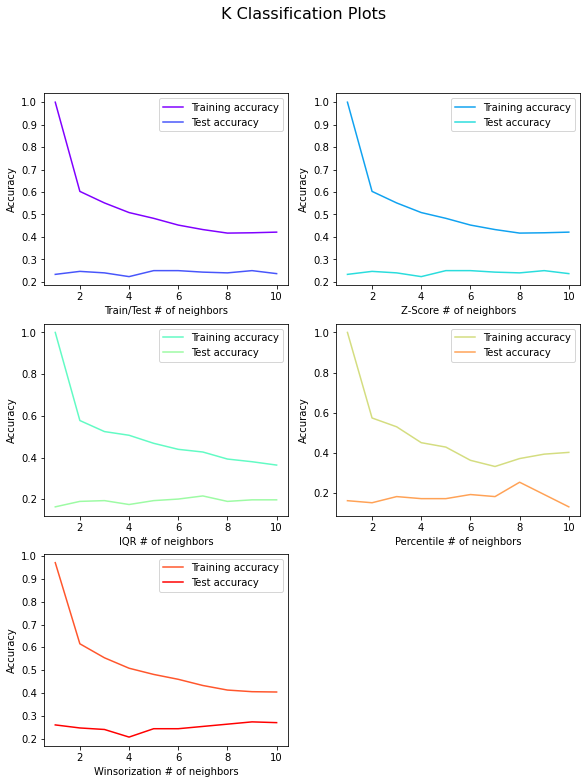

In [11]:
for name,model in zip(NAMES, MODELS):
  print(name)
  display(print_results(model, name, X_train, y_train, X_test, y_test,
                                     XTrainZ, yTrainZ, XTestZ, yTestZ,
                                     XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
                                     XTrainPER, yTrainPER, XTestPER, yTestPER,
                                     XTrainWIN, yTrainWIN, XTestWIN, yTestWIN))
  print('\n')

kClassPlot(X_train, y_train, X_test, y_test,
           XTrainZ, yTrainZ, XTestZ, yTestZ,
           XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
           XTrainPER, yTrainPER, XTestPER, yTestPER,
           XTrainWIN, yTrainWIN, XTestWIN, yTestWIN)

## Dataset 2: California Housing

California housing data-set comprises data and information from the 1990 California census. The data pertains to the houses found in a particular California district and some summary statistics about them. This data set requires elementary data cleaning, has an optimal size and contains an easily comprehensible list of variables making it ideal for learning and implementing machine learning algorithms.

It comprises of data from the 1990 census, thus, wouldn’t be too helpful for predicting the latest housing prices, but it does make an accessible introductory dataset for understanding machine learning. In addition, the data are not cleaned, therefore some pre-processing steps are required before working on the data-set thereby facilitating learning.

### 2.1 Loading the Dataset & Detecting NANs

Data has NANs: False


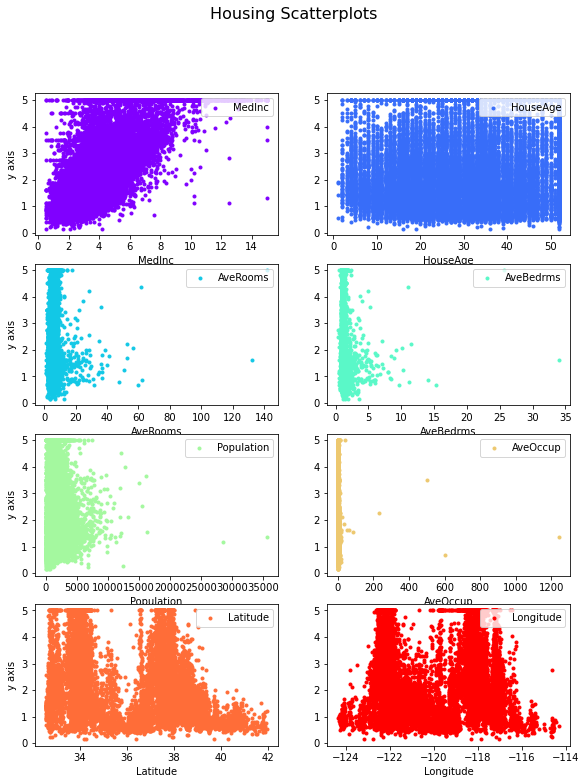

In [12]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
scatterPlot('Housing Scatterplots')

# Checking for NANs
print('Data has NANs:', pd.isna(housing))

### 2.2 Scaling the data

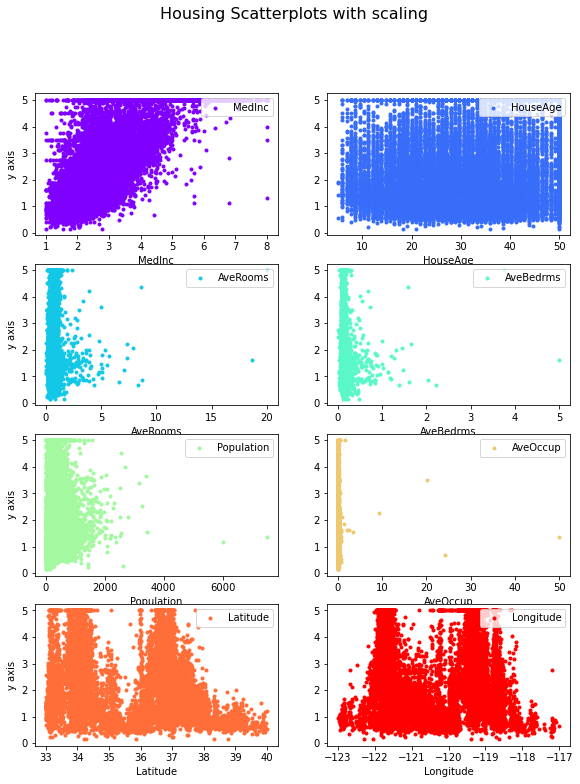

In [13]:
# Scale MedInc: 1-8 (float)
f1_l, f1_u = float(1), float(8)
X[:,0] = np.interp(X[:,0], (X[:,0].min(), X[:,0].max()), (f1_l, f1_u))

# Scale HouseAge: 5-50 (integer)
f2_l, f2_u = 5, 50
X[:,1] = np.interp(X[:,1], (X[:,1].min(), X[:,1].max()), (f2_l, f2_u))

# Scale AveRooms: 0-20 (integer)
f3_l, f3_u = 0, 20
X[:,2] = np.interp(X[:,2], (X[:,2].min(), X[:,2].max()), (f3_l, f3_u))

# Scale AveBedrms: 0-5 (float)
f4_l, f4_u = float(0), float(5)
X[:,3] = np.interp(X[:,3], (X[:,3].min(), X[:,3].max()), (f4_l, f4_u))

# Scale Population: 0-7500 (float)
f5_l, f5_u = float(0), float(7500)
X[:,4] = np.interp(X[:,4], (X[:,4].min(), X[:,4].max()), (f5_l, f5_u))

# Scale AveOccup: 0-50 (float)
f6_l, f6_u = float(0), float(50)
X[:,5] = np.interp(X[:,5], (X[:,5].min(), X[:,5].max()), (f6_l, f6_u))

# Scale Lattitude: 33-40 (float)
f7_l, f7_u = float(33), float(40)
X[:,6] = np.interp(X[:,6], (X[:,6].min(), X[:,6].max()), (f7_l, f7_u))

# Scale Longitude: -123-(-117) (float)
f8_l, f8_u = float(-123), float(-117)
X[:,7] = np.interp(X[:,7], (X[:,7].min(), X[:,7].max()), (f8_l, f8_u))

scatterPlot('Housing Scatterplots with scaling')

### 2.3 Detect and Remove Outliers

Z-Score: Comparing the distribution of MedInc after capping


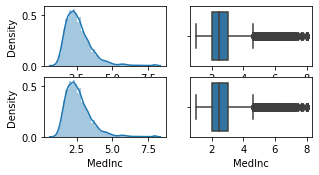

IQR Based Filtering: Comparing the distribution of MedInc after capping


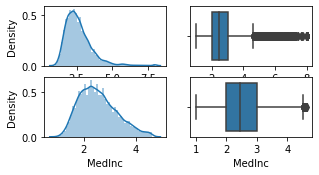

Percentile: Comparing the distribution of MedInc after trimming


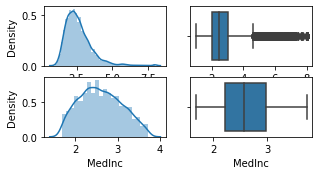

Winsorization: Comparing the distribution of MedInc after capping


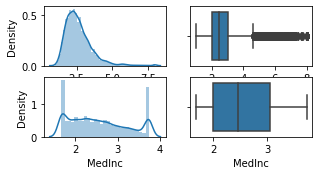

In [14]:
# Converting y to multiclass (5 classes)
c1, c2, c3, c4 = np.percentile(y, [20, 40, 60, 80])
pos = 0
for i in y:
    if i < c1:
        y[pos] = 0
    elif i < c2:
        y[pos] = 1
    elif i < c3:
        y[pos] = 2
    elif i < c4:
        y[pos] = 3
    else:
        y[pos] = 4
    pos+=1


# Convert to DataFrame
df = pd.DataFrame({housing.feature_names[0]: X[:,0].flatten(),
                   housing.feature_names[1]: X[:,1].flatten(),
                   housing.feature_names[2]: X[:,2].flatten(),
                   housing.feature_names[3]: X[:,3].flatten(),
                   housing.feature_names[4]: X[:,4].flatten(),
                   housing.feature_names[5]: X[:,5].flatten(),
                   housing.feature_names[6]: X[:,6].flatten(),
                   housing.feature_names[7]: X[:,7].flatten(),
                   'y': y})

# Initializing dfs
df_z = df_iqr = df_per = df_win = df.copy()
for i in range(0,8):
    df_z,df_iqr,df_per,df_win = outliers(df.columns[i], df, df_z,df_iqr,df_per,df_win)

# Plotting One Feature
DFLIST = [df_z,df_iqr,df_per,df_win]
DFNAMES = ['Z-Score','IQR Based Filtering','Percentile','Winsorization']
feature = housing.feature_names[0]
for i,name in zip(DFLIST, DFNAMES):
    if name == 'Percentile':
        comparePlot(df,i,feature,name,type1='trimming')
    else:
        comparePlot(df,i,feature,name)

# Converting to numpy
df_z = df_z.to_numpy()
df_iqr = df_iqr.to_numpy()
df_per = df_per.to_numpy()
df_win = df_win.to_numpy()

### 2.4 Apply sampling strategies

In [15]:
# Training: 70%, Test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainZ, XTestZ, yTrainZ,  yTestZ = train_test_split(df_z[:,0:8], df_z[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainIQR, XTestIQR, yTrainIQR, yTestIQR = train_test_split(df_iqr[:,0:8], df_iqr[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainPER, XTestPER, yTrainPER, yTestPER = train_test_split(df_per[:,0:8], df_per[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)
XTrainWIN, XTestWIN, yTrainWIN, yTestWIN = train_test_split(df_win[:,0:8], df_win[:,-1], test_size=0.3, shuffle=True, random_state = RANDOM_STATE)

### 2.5 Models

Linear Regression


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,-7.38,-7.38,0.64,0.63,0.64
1,Test Accuracy,-40.56,-40.56,0.63,0.63,0.64
2,R²,-40.56,-40.56,0.63,0.63,0.64




Logistic Regression


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.47,0.47,0.45,0.41,0.46
1,Test Accuracy,0.47,0.47,0.45,0.41,0.46
2,R²,0.34,0.34,0.29,0.23,0.31
3,Accuracy,0.47,0.47,0.45,0.41,0.46
4,Weighted F1,0.44,0.44,0.41,0.38,0.43
5,Weighted Precision,0.44,0.44,0.42,0.42,0.43
6,Weighted Recall,0.47,0.47,0.45,0.41,0.46




XGBoost Regressor


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.94,0.94,0.86,0.87,0.94
1,Test Accuracy,0.67,0.67,0.86,0.86,0.67
2,R²,0.73,0.73,0.88,0.89,0.73
3,Accuracy,0.67,0.67,0.86,0.86,0.67
4,Weighted F1,0.67,0.67,0.86,0.86,0.67
5,Weighted Precision,0.67,0.67,0.86,0.86,0.67
6,Weighted Recall,0.67,0.67,0.86,0.86,0.67




K Neighbor Regressor


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.63,0.63,0.46,0.38,0.62
1,Test Accuracy,0.22,0.22,0.48,0.36,0.19
2,R²,0.22,0.22,0.48,0.36,0.19




K Neighbor Classifier


,Score,Train/Test,Z-Score,IQR,Percentile,Winsorization
0,Training Accuracy,0.68,0.68,0.56,0.52,0.67
1,Test Accuracy,0.33,0.33,0.56,0.50,0.32
2,R²,-0.13,-0.13,0.27,-0.00,-0.17
3,Accuracy,0.33,0.33,0.56,0.50,0.32
4,Weighted F1,0.32,0.32,0.54,0.49,0.31
5,Weighted Precision,0.37,0.37,0.60,0.57,0.36
6,Weighted Recall,0.33,0.33,0.56,0.50,0.32


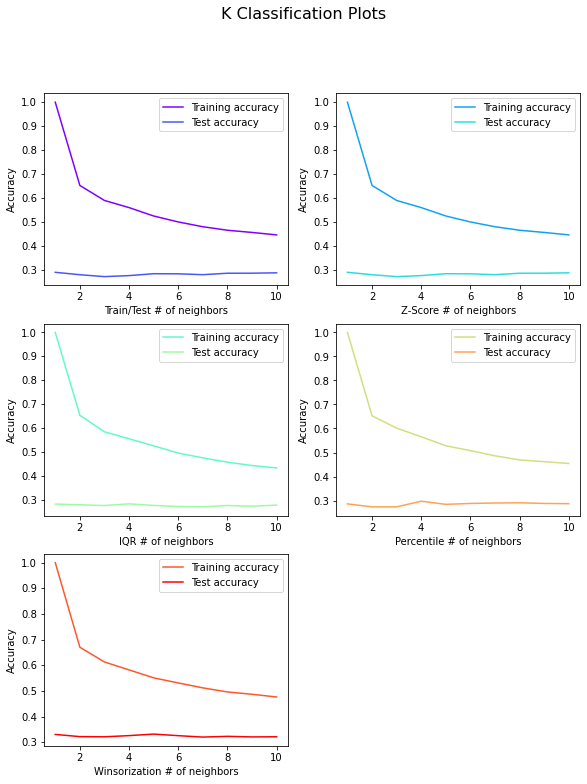

In [16]:
for name,model in zip(NAMES, MODELS):
  print(name)
  display(print_results(model, name, X_train, y_train, X_test, y_test,
                                     XTrainZ, yTrainZ, XTestZ, yTestZ,
                                     XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
                                     XTrainPER, yTrainPER, XTestPER, yTestPER,
                                     XTrainWIN, yTrainWIN, XTestWIN, yTestWIN))
  print('\n')

kClassPlot(X_train, y_train, X_test, y_test,
          XTrainZ, yTrainZ, XTestZ, yTestZ,
          XTrainIQR, yTrainIQR, XTestIQR, yTestIQR,
          XTrainPER, yTrainPER, XTestPER, yTestPER,
          XTrainWIN, yTrainWIN, XTestWIN, yTestWIN)

## Summary

In this project we have considered two data sets: one synthetic and one real world data set (California Housing). The synthetic data set has $1,000$ samples and five features which have all been graphed using a scatter plot. We then added outliers to our data set, scaled all of the features as instructed and plotted the features again. Next we moved on to dealing with the outliers. We used four methods to do this: z-score, interquartile range based filtering, percentiles and winsorization (these methods have each been explained earlier in the project). Once the outliers had been dealt with the data set was split into train and test for the four different methods. The data set as it was before the outlier methods were employed was also split into train and test at this point for comparison. Next we used four differed regression techniques: linear regression, logistic regression, xgboost regressor and k neighbours (classifier and regressor). Next we took the California Housing data set and followed the same procedure as outlined above for the synthetic data set (except in this case there was no need to add outliers).

<br>

### **Synthetic dataset:**
---

1. Synthetic dataset was created using make_regression method. This dataset included a total of $1,000$ samples with $5$ features.
2.	Null values were not detected and four outlier techniques were applied, namely, Z-score based technique, IQR based filtering, Percentile based technique, and Winsorization.
3.	For the synthetic dataset, following are the observation with respect to the scores calculated:
    -	Observation on R $^2$ score: XBG Boost model has a consistent score $(0.57)$ on all outlier techniques.
    -	Observation on R $^2$ score : Logistic regression model has poor results.

<br>

### **California Housing dataset:**
---

1.	The California housing dataset included a total of $20,640$ samples with a total of $8$ features.
2.	Null values were not detected and four outlier techniques were applied, namely, Z-score based technique, IQR based filtering, Percentile based technique, and Winsorization.
3.	For the California housing dataset, following are the observation with respect to the scores calculated:
    -	Observation on R $^2$ score: XBG Boost model has a consistent score $(0.73)$ on all outlier techniques with scores reaching $\sim 0.90$ using the IQR and Percentile outlier techniques.
    -	Observation on R $^2$ score : Logistic regression model and K neighbour has poor results for this dataset.

<br>

We learnt the important and fundamental concept of detecting and eliminating the outliers in a dataset using various techniques and applying Regression methods in Machine learning. 

## References

1. Constable, D., 2021. What is Linear Regression? A Simple Explanation - The Data Student. [online] thedatastudent.com. Available at: https://thedatastudent.com/what-is-linear-regression-a-simple-explanation/ [Accessed 29 October 2021]

2. Regression - Machine Learning Available at: https://builtin.com/data-science/regression-machine-learning

3. California Housing Dataset - Available at: https://www.kaggle.com/camnugent/california-housing-prices

4. Kidder, S., 2017 Using Percentiles to Identify Outliers and the Typical Experience | Mux blog. [online] Available at: <https://mux.com/blog/using-percentiles-to-identify-outliers/> [Accessed 26 October 2021].

5. Brownlee, J., 2021. How to Remove Outliers for Machine Learning. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/> [Accessed 26 October 2021].

6. W., I., 2021. Z-Score and How It’s Used to Determine an Outlier. [online] Medium. Available at: <https://medium.com/clarusway/z-score-and-how-its-used-to-determine-an-outlier-642110f3b482> [Accessed 26 October 2021].

7. scikit-learn (2019). sklearn.neighbors.KNeighborsRegressor — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html [Accessed 25 Oct. 2021].

8. Singh, A. (2018). A Practical Introduction to K-Nearest Neighbor for Regression. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/ [Accessed 25 Oct. 2021].

9. Zach (2021). How to Winsorize Data: Definition & Examples. [online] Statology. Available at: https://www.statology.org/winsorize/ [Accessed 25 Oct. 2021].
